In [1]:
import pandas as pd
df = pd.read_csv('c:/data/ozone/ozone2.csv')
df.head()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
0,41.00000,0,190.000000,7.4,67,5,1
1,36.00000,0,118.000000,8.0,72,5,2
2,12.00000,0,149.000000,12.6,74,5,3
3,18.00000,0,313.000000,11.5,62,5,4
4,42.12931,1,185.931507,14.3,56,5,5


In [2]:
cols = ['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=10)

#### 엘보우(elbow) 기법
- inertia value: 군집화가 된 후 각 중심점에서 군집의 데이터간의 거리를 합산한 값
    - 작을수록 응집도가 높은 군집
- inertias 값이 하강하다가 팔꿈치처럼 꺾이는 부분을 최적의 클러스터 수로 판단

Text(0.5, 0, 'number of clusters')

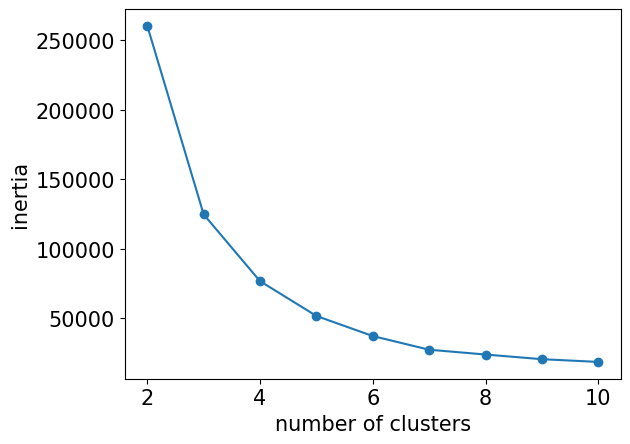

In [4]:
#최적의 클러스터 갯수 구하기(엘보우(elbow) 기법)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clusters = range(2, 11)
inertias = []
for n in clusters:
    # 모델 생성
    model = KMeans(n_clusters=n, random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_)
plt.rcParams['font.size'] = 15
plt.plot(clusters, inertias, '-o')
plt.ylabel('inertia')
plt.xlabel('number of clusters')

In [5]:
model = KMeans(n_clusters=3, random_state=10)
print(model)
pred = model.fit_predict(X_train)
print(pred[:5])
pred = model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[0 2 1 2 1]
[1 1 0 1 2]


#### 실루엣(silhouette) 기법
- 군집화에서는 개별 라벨값보다는 군집이 중요
- 실루엣 값: 한 클러스터 안의 데이터들과 다른 클러스터의 비슷한 정도
    - ai: i와 같은 군집에 속한 원소들의 평균 거리
    - bi: i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
    - (bi - ai) / max(ai,bi)
- 실루엣 계수가 높을수록 좋은 모형
- 군집의 형상이 복잡하거나 크기의 차이가 많이 나면 비교가 어려움

In [6]:
#실루엣 기법 - 실루엣 계수가 높을수록 좋은 모형
from sklearn.metrics import silhouette_score
silhouette_score(X_test, pred)

0.5558953548440109

In [7]:
#클러스터 수를 2개로 설정
model = KMeans(n_clusters=2, random_state=10)
print(model)
pred = model.fit_predict(X_train)
print(pred[:5])
pred = model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[0 1 1 1 1]
[1 1 0 1 1]


In [8]:
silhouette_score(X_test, pred)

0.6729790456857528

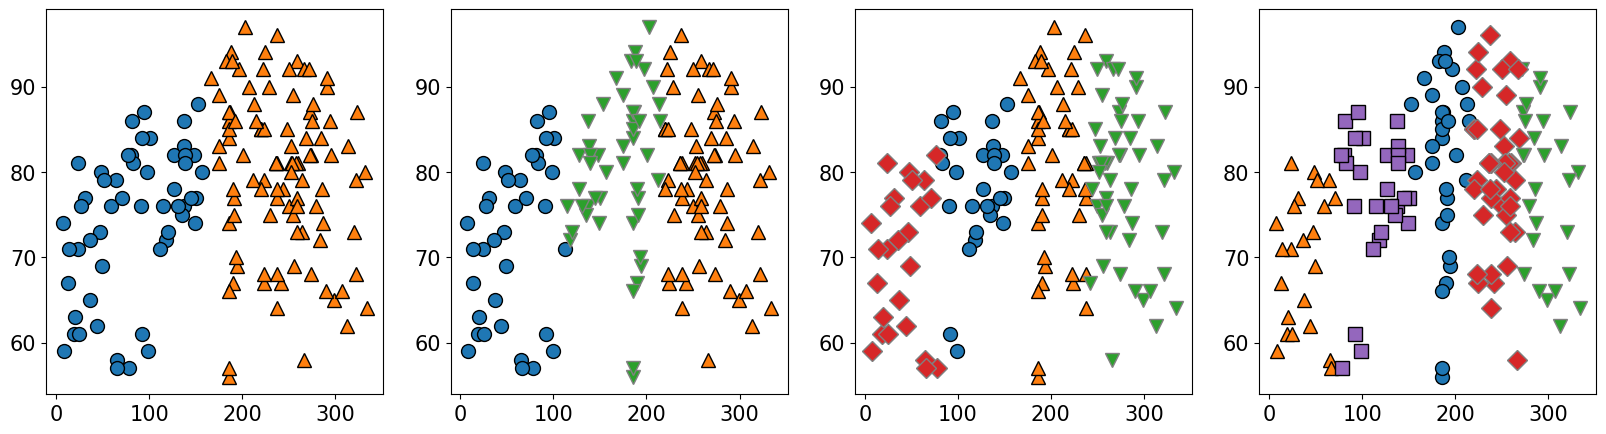

In [9]:
#k값에 따른 클러스터링 결과
import mglearn
# 1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20,5))

# 2, 3, 4, 5개의 클러스터로 나눌 경우
idx = 0
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X['Solar.R'], X['Temp'], lbls, ax=axes[idx])
    idx += 1
plt.show()